# Pandas Exercises

## Creating DataFrames and Using Sample Data Sets

This is the Jupyter Notebook runnable exercises version of the article, [Pandas Practice Questions – Fifty-Two Examples to Make You an Expert](https://codesolid.com/pandas-practice-questions-twenty-one-examples-to-make-you-an-expert/).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

**1.** Using NumPy, create a Pandas DataFrame with five rows and three columms:

In [ ]:
data = np.random.random((5, 3))
dataframe = pd.DataFrame(data)
print(dataframe)

          0         1         2
0  0.605816  0.901438  0.986681
1  0.268983  0.903615  0.308003
2  0.113420  0.469595  0.691663
3  0.495951  0.383669  0.800026
4  0.101963  0.906581  0.158253


**2.** For a Pandas DataFrame created from a NumPy array, what is the default behavior for the labels for the columns?  For the rows?

Default labels for coloumns and rows are integer starting from 0.

**3.** Create a second DataFrame as above with five rows and three columns, setting the row labels to the names of any five major US cities and the column labels to the first three months of the year.

In [4]:
data = np.random.random((5, 3))
dataframe = pd.DataFrame(data,index = ['New York','Los Angeles','Chicago','Washington DC','San Francisco'],
                         columns = ['January','February','March'])
print(dataframe)

                January  February     March
New York       0.414687  0.312787  0.380289
Los Angeles    0.750398  0.350176  0.265271
Chicago        0.495023  0.680971  0.991503
Washington DC  0.117360  0.847950  0.889092
San Francisco  0.325298  0.383795  0.163929


**4.** You recall that the Seaborn package has some data sets built in, but can't remember how to list and load them. Assuming the functions to do so have "data" in the name, how might you locate them?  You can assume a Jupyter Notebook / IPython environment and explain the process, or write the code to do it in Python.

In [ ]:
import seaborn as sns
data_functions = [func for func in dir(sns) if "data" in func.lower()]

## Loading data from CSV

**5**. Zillow home data is available at this URL: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

Open this file as a DataFrame named df_homes in Pandas.

In [6]:
url = "https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
df_homes = pd.read_csv(url)

**6.** Save the DataFrame, df_homes, to a local CSV file, "zillow_home_data.csv".  

In [7]:
df_homes.to_csv("zillow_home_data.csv", index=False)

**7.** Load zillow_home_data.csv back into a new Dataframe, df_homes_2

In [8]:
df_homes_2 = pd.read_csv("zillow_home_data.csv")

**8.** Compare the dimensions of the two DataFrames, df_homes and df_homes_2.  Are they equal?  If not, how can you fix it?

In [12]:
print("df_homes:", df_homes.shape)
print("df_homes_2:", df_homes_2.shape)
if not df_homes.shape == df_homes_2.shape:
  df_homes_2 = pd.read_csv("zillow_home_data.csv")

df_homes: (895, 303)
df_homes_2: (895, 303)


**9.** A remote spreadsheet showing how a snapshot of how traffic increased for a hypothetical website is available here: https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx. Load the worksheet page of the spreasheet data labelled "February 2022" as a DataFrame named "feb".  Note: the leftmost column in the spreadsheet is the index column.

In [14]:
url = "https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx"
feb = pd.read_excel(url, sheet_name="February 2022",index_col=0)
print(feb.head())

            This Month  Last Month  Month to Month Increase
Users             1800         280                 5.428571
New Users         1700         298                 4.704698
Page Views        2534         436                 4.811927


**10.** The "Month to Month Increase" column is a bit hard to understand, so ignore it for now.  Given the values for "This Month" and "Last Month", create a new column, "Percentage Increase".

In [17]:
feb["Percentage Increase"] = ((feb["This Month"] - feb["Last Month"])/feb["Last Month"])*100
print(feb.head())

            This Month  Last Month  Month to Month Increase  \
Users             1800         280                 5.428571   
New Users         1700         298                 4.704698   
Page Views        2534         436                 4.811927   

            Percentage Increase  
Users                542.857143  
New Users            470.469799  
Page Views           481.192661  


## Basic Operations on Data

**11.** Using Seaborn, get a dataset about penguins into a dataframe named "df_penguins".  Note that because all of the following questions depend on this example, we'll provide the solution here so no one gets stuck:

In [18]:
df_penguins = sb.load_dataset('penguins')

**12.** Write the code to show the the number of rows and columns in df_penguins

In [19]:
print(df_penguins.shape)

(344, 7)


**13.** How might you show the first few rows of df_penguins?

In [20]:
print(df_penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


**14.** How can you return the unique species of penguins from df_penguins?  How many unique species are there?

In [21]:
unique_species = df_penguins['species'].unique()
num_unique_species = len(unique_species)
print("Unique species:", unique_species)
print("No. of unique species:", num_unique_species)

Unique species: ['Adelie' 'Chinstrap' 'Gentoo']
No. of unique species: 3


**15.** What function can we use to drop the rows that have missing data?

In [22]:
df_penguins_cleaned = df_penguins.dropna()
print(df_penguins_cleaned.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


**16.** By default, will this modify df_penguins or will it return a copy?

By default it will return a copy of df_penguins

**17.** How can we override the default?

To override this defalut we use inplace=True parameter.

**18.** Create a new DataFrame, df_penguins_full, with the missing data deleted.

In [23]:
df_penguins_full = df_penguins.dropna()

**19.** What is the average bill length of a penguin, in millimeters, in this (df_full) data set?

In [24]:
avg_bill_len = df_penguins_full['bill_length_mm'].mean()
print("Average bill length of penguin:",avg_bill_len)

Average bill length of penguin: 43.99279279279279


**20.** Which of the following is most strongly correlated with bill length?  a) Body mass?  b) Flipper length?  c) Bill depth?  Show how you arrived at the answer.

In [25]:
numeric_df = df_penguins_full.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix['bill_length_mm'])


bill_length_mm       1.000000
bill_depth_mm       -0.228626
flipper_length_mm    0.653096
body_mass_g          0.589451
Name: bill_length_mm, dtype: float64


**21.** How could you show the median flipper length, grouped by species?

In [27]:
median_len = df_penguins_full.groupby('species')['flipper_length_mm'].median()
print(median_len)

species
Adelie       190.0
Chinstrap    196.0
Gentoo       216.0
Name: flipper_length_mm, dtype: float64


**22.** Which species has the longest flippers?

The Gentoo species

**23.** Which two species have the most similar mean weight?  Show how you arrived at the answer.

The two species with the most similar mean body mass are: Adelie and Chinstrap.

In [31]:
mean_weights = df_penguins.groupby('species')['body_mass_g'].mean()
mean_weights_array = mean_weights.values
mean_weight_diff = mean_weights_array - mean_weights_array[:, None]
diff_matrix = np.abs(mean_weight_diff)
np.fill_diagonal(diff_matrix, np.inf)
min_diff_indices = np.unravel_index(np.argmin(diff_matrix), diff_matrix.shape)
species_1 = mean_weights.index[min_diff_indices[0]]
species_2 = mean_weights.index[min_diff_indices[1]]
species_pair = (mean_weights.index[min_diff_indices[0]], mean_weights.index[min_diff_indices[1]])
print(f"The two species with the most similar mean body mass are: {species_pair[0]} and {species_pair[1]}")


The two species with the most similar mean body mass are: Adelie and Chinstrap


**24.** How could you sort the rows by bill length?

In [32]:
df_sorted = df_penguins_full.sort_values(by='bill_length_mm')
print(df_sorted)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
142     Adelie      Dream            32.1           15.5              188.0   
98      Adelie      Dream            33.1           16.1              178.0   
70      Adelie  Torgersen            33.5           19.0              190.0   
92      Adelie      Dream            34.0           17.1              185.0   
18      Adelie  Torgersen            34.4           18.4              184.0   
..         ...        ...             ...            ...                ...   
335     Gentoo     Biscoe            55.1           16.0              230.0   
215  Chinstrap      Dream            55.8           19.8              207.0   
321     Gentoo     Biscoe            55.9           17.0              228.0   
169  Chinstrap      Dream            58.0           17.8              181.0   
253     Gentoo     Biscoe            59.6           17.0              230.0   

     body_mass_g     sex  
142       3050.0  Female

**25.** How could you run the same sort in descending order?

In [33]:
df_sorted_dec = df_penguins_full.sort_values(by='bill_length_mm',ascending= False)
print(df_sorted_dec)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
253     Gentoo     Biscoe            59.6           17.0              230.0   
169  Chinstrap      Dream            58.0           17.8              181.0   
321     Gentoo     Biscoe            55.9           17.0              228.0   
215  Chinstrap      Dream            55.8           19.8              207.0   
335     Gentoo     Biscoe            55.1           16.0              230.0   
..         ...        ...             ...            ...                ...   
18      Adelie  Torgersen            34.4           18.4              184.0   
92      Adelie      Dream            34.0           17.1              185.0   
70      Adelie  Torgersen            33.5           19.0              190.0   
98      Adelie      Dream            33.1           16.1              178.0   
142     Adelie      Dream            32.1           15.5              188.0   

     body_mass_g     sex  
253       6050.0    Male

**26.** How could you sort by species first, then by body mass?

In [34]:
df_sort = df_penguins_full.sort_values(by=['species','body_mass_g'])
print(df_sort)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
58   Adelie     Biscoe            36.5           16.6              181.0   
64   Adelie     Biscoe            36.4           17.1              184.0   
54   Adelie     Biscoe            34.5           18.1              187.0   
98   Adelie      Dream            33.1           16.1              178.0   
116  Adelie  Torgersen            38.6           17.0              188.0   
..      ...        ...             ...            ...                ...   
331  Gentoo     Biscoe            49.8           15.9              229.0   
297  Gentoo     Biscoe            51.1           16.3              220.0   
337  Gentoo     Biscoe            48.8           16.2              222.0   
253  Gentoo     Biscoe            59.6           17.0              230.0   
237  Gentoo     Biscoe            49.2           15.2              221.0   

     body_mass_g     sex  
58        2850.0  Female  
64        2850.0  Female  
54    

## Selecting Rows, Columns, and Cells

Let's look at some precious stones now, and leave the poor penguins alone for a while.  Let's look at some precious stones now, and leave the poor penguins alone for a while.  

**27.** Load the Seaborn "diamonds" dataset into a Pandas dataframe named diamonds.

In [35]:
diamonds=sb.load_dataset('diamonds')

**28.** Display the columns that are available.

In [36]:
print(diamonds.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


**29.** If you select a single column from the diamonds DataFrame, what will be the type of the return value?

If a single column selected the return type will be pandas.core.series.Series

**30.** Select the 'table' column and show its type

In [37]:
table_column = diamonds["table"]
print(type(table_column))

<class 'pandas.core.series.Series'>


**31.** Select the first ten rows of the price and carat columns ten rows of the diamonds DataFrame into a variable called subset, and display them.

In [38]:
subset = diamonds[["price","carat"]].head(10)
print(subset)

   price  carat
0    326   0.23
1    326   0.21
2    327   0.23
3    334   0.29
4    335   0.31
5    336   0.24
6    336   0.24
7    337   0.26
8    337   0.22
9    338   0.23


**32.** For a given column, show the code to display the datatype of the _values_ in the column?  

In [43]:
print(diamonds['price'].dtype, diamonds['carat'].dtype)


int64 float64


**33.** Select the first row of the diamonds DataFrame into a variable called row.

In [44]:
row = diamonds.iloc[0]

**34.** What would you expect the data type of the row to be?  Display it.

A Pandas series

In [45]:
print(type(row))

<class 'pandas.core.series.Series'>


**35.** Can you discover the names of the columns using only the row returned in #33?  Why or why not?Can you discover the names of the columns using only the row returned in #33?  Why or why not?

Yes, because a row series should have the columns as the index (See below):

In [46]:
print(row)

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object


**36.** Select the row with the highest priced diamond.

In [47]:
h_price_row = diamonds.loc[diamonds['price'].idxmax()]
print(h_price_row)

carat         2.29
cut        Premium
color            I
clarity        VS2
depth         60.8
table         60.0
price        18823
x              8.5
y             8.47
z             5.16
Name: 27749, dtype: object


**37.** Select the row with the lowest priced diamond.

In [48]:
l_price_row = diamonds.loc[diamonds['price'].idxmin()]
print(l_price_row)

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object


## Some Exercises Using Time Series

**38.** Load the taxis dataset into a DataFrame, ```taxis```.

In [49]:
taxis = sb.load_dataset("taxis")

**39.** The 'pickup' column contains the date and time the customer picked up, but it's a string.  Add a column to the DataFrame, 'pickup_time', containing the value in 'pickup' as a DateTime.

In [51]:
taxis["pickup_time"] = pd.to_datetime(taxis["pickup"])

**40.** We have a hypothesis that as the day goes on, the tips get higher.  We'll need to wrangle the data a bit before testing this, however.  First, now that we have a datetime column, pickup_time, create a subset of it to create a new DataFrame, taxis_one_day. This new DataFrame should have values between '2019-03-23 00:06:00' (inclusive) and '2019-03-24 00:00:00' (exlusive).

In [53]:
taxis_one_day = taxis[(taxis['pickup_time']>='2019-03-23 00:06:00') &
                      (taxis['pickup_time']<'2019-03-24 00:00:00')]
print(taxis_one_day.head())

                 pickup             dropoff  passengers  distance  fare   tip  \
0   2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
8   2019-03-23 11:48:50 2019-03-23 12:06:14           1      3.63  15.0  1.00   
17  2019-03-23 20:50:49 2019-03-23 21:02:07           1      2.60  10.5  2.00   
117 2019-03-23 09:39:25 2019-03-23 09:56:45           0      3.60  15.5  3.75   
144 2019-03-23 18:35:01 2019-03-23 18:47:39           1      3.20  12.5  2.00   

     tolls  total   color      payment          pickup_zone  \
0      0.0  12.95  yellow  credit card      Lenox Hill West   
8      0.0  19.30  yellow  credit card    East Harlem South   
17     0.0  16.30  yellow  credit card       Midtown Center   
117    0.0  22.55  yellow  credit card       Yorkville East   
144    0.0  17.80  yellow  credit card  UN/Turtle Bay South   

                     dropoff_zone pickup_borough dropoff_borough  \
0             UN/Turtle Bay South      Manhattan       Manhattan  

**41.** We now have a range from morning until midnight, but we to take the mean of the numeric columns, grouped at one hour intervals.  Save the result as df_means, and display it.

In [60]:
taxis["pickup_time"] = pd.to_datetime(taxis["pickup"])
taxis_one_day = taxis[(taxis['pickup_time']>='2019-03-23 00:06:00') &
                      (taxis['pickup_time']<'2019-03-24 00:00:00')]
taxis_one_day.set_index('pickup_time', inplace=True)
numeric_columns = taxis_one_day.select_dtypes(include='number')
df_means = numeric_columns.resample('h').mean()
print(df_means)


                     passengers  distance       fare       tip     tolls  \
pickup_time                                                                
2019-03-23 00:00:00    1.000000  1.911667   8.583333  1.415000  0.000000   
2019-03-23 01:00:00    1.250000  1.325000   7.875000  1.525000  0.000000   
2019-03-23 02:00:00    1.727273  1.739091   8.181818  1.641818  0.000000   
2019-03-23 03:00:00    1.500000  3.377500  11.750000  2.410000  0.000000   
2019-03-23 04:00:00    2.000000  0.950000   5.500000  0.915000  0.000000   
2019-03-23 05:00:00    2.000000  1.270000   6.000000  0.980000  0.000000   
2019-03-23 06:00:00    1.000000  0.400000  21.500000  0.000000  0.000000   
2019-03-23 07:00:00    2.333333  0.980000   5.250000  1.165000  0.000000   
2019-03-23 08:00:00    1.000000  0.020000   2.500000  0.000000  0.000000   
2019-03-23 09:00:00    1.500000  1.352000   7.400000  1.674000  0.000000   
2019-03-23 10:00:00    1.000000  1.760000   8.750000  0.727500  0.000000   
2019-03-23 1

**42.** Create a simple line plot of the value "distance".  

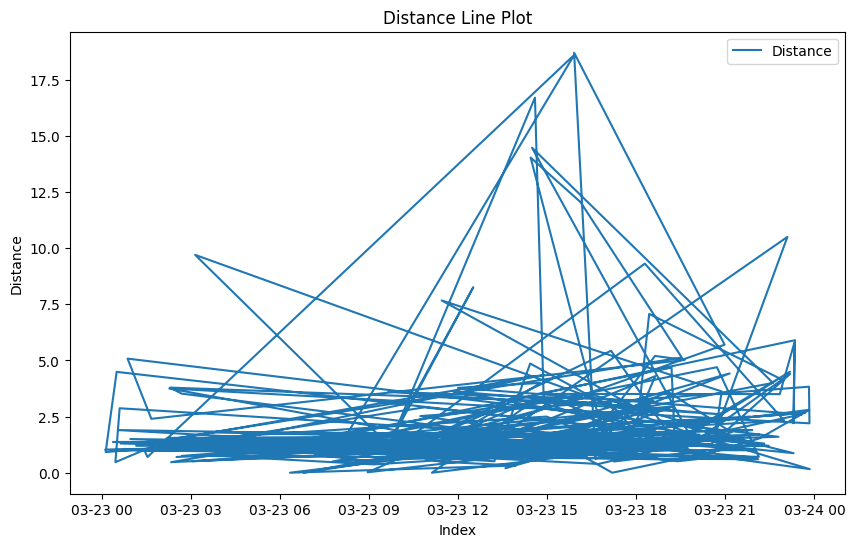

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(taxis_one_day['distance'], label='Distance')

plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('Distance Line Plot')

plt.legend()
plt.show()

**43.** Overall, do riders travel further or less far as the day progresses?

As ths day progresses there is a noticable increase during afternoon which again decreases as day progress further.

**44.** Create a new column in taxis_means, ```tip_in_percent```.  The source columns for this should be "fare" and "tip"

In [64]:
taxis_means = numeric_columns.resample('h').mean()
taxis_means['tip_in_percent'] = (taxis_means['tip'] / taxis_means['fare']) * 100
print(taxis_means.head())

                     passengers  distance       fare       tip  tolls  \
pickup_time                                                             
2019-03-23 00:00:00    1.000000  1.911667   8.583333  1.415000    0.0   
2019-03-23 01:00:00    1.250000  1.325000   7.875000  1.525000    0.0   
2019-03-23 02:00:00    1.727273  1.739091   8.181818  1.641818    0.0   
2019-03-23 03:00:00    1.500000  3.377500  11.750000  2.410000    0.0   
2019-03-23 04:00:00    2.000000  0.950000   5.500000  0.915000    0.0   

                         total  tip_in_percent  
pickup_time                                     
2019-03-23 00:00:00  12.965000       16.485437  
2019-03-23 01:00:00  12.575000       19.365079  
2019-03-23 02:00:00  13.169091       20.066667  
2019-03-23 03:00:00  17.335000       20.510638  
2019-03-23 04:00:00  10.215000       16.636364  


**45.** Create a new column, time_interval, as a range of integer values beginning with zero.

In [66]:
taxis_means["time_interval"]=range(len(taxis_means))
print(taxis_means.head())

                     passengers  distance       fare       tip  tolls  \
pickup_time                                                             
2019-03-23 00:00:00    1.000000  1.911667   8.583333  1.415000    0.0   
2019-03-23 01:00:00    1.250000  1.325000   7.875000  1.525000    0.0   
2019-03-23 02:00:00    1.727273  1.739091   8.181818  1.641818    0.0   
2019-03-23 03:00:00    1.500000  3.377500  11.750000  2.410000    0.0   
2019-03-23 04:00:00    2.000000  0.950000   5.500000  0.915000    0.0   

                         total  tip_in_percent  time_interval  
pickup_time                                                    
2019-03-23 00:00:00  12.965000       16.485437              0  
2019-03-23 01:00:00  12.575000       19.365079              1  
2019-03-23 02:00:00  13.169091       20.066667              2  
2019-03-23 03:00:00  17.335000       20.510638              3  
2019-03-23 04:00:00  10.215000       16.636364              4  


Display the correlations between the following pairs of values:
1. tip_in_percent and distance.
1. tip_in_percent and passengers.
1. tip_in_percent and time_interval.

In [67]:
correlation_tip_distance = taxis_means['tip_in_percent'].corr(taxis_means['distance'])
correlation_tip_passengers = taxis_means['tip_in_percent'].corr(taxis_means['passengers'])
correlation_tip_time_interval = taxis_means['tip_in_percent'].corr(taxis_means['time_interval'])

print(f"Correlation between tip_in_percent and distance: {correlation_tip_distance}")
print(f"Correlation between tip_in_percent and passengers: {correlation_tip_passengers}")
print(f"Correlation between tip_in_percent and time_interval: {correlation_tip_time_interval}")

Correlation between tip_in_percent and distance: 0.00953302789086911
Correlation between tip_in_percent and passengers: 0.32623184018268747
Correlation between tip_in_percent and time_interval: -0.23239795213315184


**47.** Admittedly, the size of the data set is fairly small given how we've subsetted it.  But based on the values in #45, which of the three pairs show the strongest correlation.

The pair which show the strongest correlation is tip_in_percent and passengers.

**48.** Did our hypothesis that people tip more as the day goes on turn out to be warranted?

Since the correlation between tip_in_percent and time_interval is negative shows that our hypothesis that people tip more as the days goes is false, the tip percentage slightly decreases.